In [4]:
import snownlp
from snownlp import SnowNLP
from snownlp import sentiment
import pandas as pd
import numpy as np
import csv
from pandas import DataFrame

In [24]:
df = pd.read_csv('zoufan(1).csv', header=0,encoding='utf-8',dtype=str)

In [25]:
df["评论"]

0                                              要有足够的自知之明
1                                            因为害怕，干脆拒绝一切
2                                              对所有事物抱有恐惧
3                                 饭饭 如果现在来一场车祸该多好 撞死我该多好
4                                               我真的做的太烂了
                             ...                        
469                              微博要是能按页数看就好了。在开发一个一键删博。
470    主要是我太喜欢删东西了。还喜欢转发微博。又不喜欢微博一直是那么多条。感觉就像强迫症一样看着不方便。
471                                      应该算日常生活吐槽➕ 分享那种
472                            就很多。各种都分享的那种（买过的东西和推荐的剧之类
473                                     我也好希望能开个博专门分享东西。
Name: 评论, Length: 474, dtype: object

In [28]:
# 测试分析第一条
text = df.评论.iloc[0]
s = SnowNLP(text)
s.sentiments

0.9562415503561497

In [29]:
# 进行批量处理
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments
df["sentiment"] = df.评论.apply(get_sentiment_cn)
df.head()

,Unnamed: 0,id,用户名,性别,地区,评论,时间,表情,sentiment
0,0,7509189899,偶然间经过,女,江苏,要有足够的自知之明,31分钟前,NaN,0.956242
1,1,6289332039,BEASLAYER,女,其他,因为害怕，干脆拒绝一切,1小时前,NaN,0.173014
2,2,6289332039,BEASLAYER,女,其他,对所有事物抱有恐惧,1小时前,NaN,0.954698
3,3,2695315050,别睡了回家了,别睡了回家了,海外,饭饭 如果现在来一场车祸该多好 撞死我该多好,2小时前,NaN,0.997069
4,4,1715253601,头拿混,男,广东,我真的做的太烂了,3小时前,NaN,0.160229


In [34]:
df.sentiment.mean()

0.5710765307069458

In [35]:
# 由于预览结果不符合期待，单独对分词进行分析
df1 = pd.read_csv('keywords1.csv', header=0,encoding='utf-8',dtype=str)
df1

,word,count
0,一键,1
1,上坡,1
2,上班,1
3,下坡,1
4,不下,1
...,...,...
501,颤抖,1
502,风月,1
503,驾驶,1
504,验证,1


In [36]:
# 测试分析第一条
text = df1.word.iloc[0]
s = SnowNLP(text)
s.sentiments

0.5660377358490564

In [38]:
# 进行批量处理
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments
df1["sentiment"] = df1.word.apply(get_sentiment_cn)
df1.head()

,word,count,sentiment
0,一键,1,0.566038
1,上坡,1,0.058776
2,上班,1,0.347826
3,下坡,1,0.500000
4,不下,1,0.349084


In [39]:
df1.sentiment.mean()

0.5524269647610558

In [44]:
# 画图看看
import seaborn as sns
import matplotlib.pyplot as plt

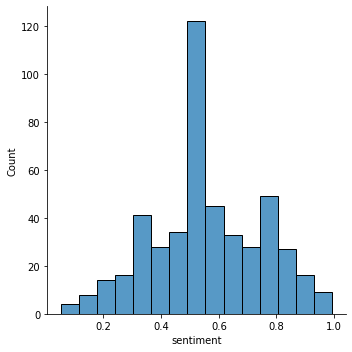

In [49]:
# 句子的直方图
sns.displot(df['sentiment'])
plt.show()

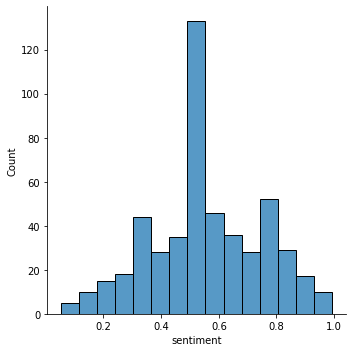

In [50]:
# 词语的直方图
sns.displot(df1['sentiment'])
plt.show()